In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

movies = pd.read_csv(r'movies_filtered.csv')

In [209]:
movies.head()

,id,title,genres,original_language,production_companies,release_date,budget,revenue,runtime,tagline,credits,keywords
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,20th Century Studios-Lightstorm Entertainment,2022-12-14,460000000.0,2.309660e+09,192,Return to Pandora.,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...
1,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,5.200000e+07,100,Save your family or save humanity. Make the ch...,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...
2,646389,Plane,Action-Adventure-Thriller,en,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,5.100000e+07,107,Survive together or die alone.,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...
3,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Marvel Studios,2022-11-09,250000000.0,8.585356e+08,162,Forever.,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...
4,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,en,DreamWorks Animation-Universal Pictures,2022-12-07,90000000.0,4.630876e+08,103,Say hola to his little friends.,Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...,fairy tale-talking dog-spin off-aftercreditsst...


In [210]:
n = len(movies)
print(n)

14783


In [211]:
dup_ids = {}
remove_dup = []
for i in tqdm(range(n)):
    idee = int(movies['id'][i])
    if idee not in dup_ids:
        dup_ids[idee] = []
    else:
        remove_dup.append(i)
    dup_ids[idee].append(i)

100%|██████████████████████████████████████████████████████████████████████████| 14783/14783 [00:00<00:00, 97546.86it/s]


In [212]:
movies = movies[~movies.index.isin(remove_dup)]
n = len(movies)

In [213]:
movies.head()

,id,title,genres,original_language,production_companies,release_date,budget,revenue,runtime,tagline,credits,keywords
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,20th Century Studios-Lightstorm Entertainment,2022-12-14,460000000.0,2.309660e+09,192,Return to Pandora.,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...
1,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,5.200000e+07,100,Save your family or save humanity. Make the ch...,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...
2,646389,Plane,Action-Adventure-Thriller,en,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,5.100000e+07,107,Survive together or die alone.,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...
3,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Marvel Studios,2022-11-09,250000000.0,8.585356e+08,162,Forever.,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...
4,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,en,DreamWorks Animation-Universal Pictures,2022-12-07,90000000.0,4.630876e+08,103,Say hola to his little friends.,Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...,fairy tale-talking dog-spin off-aftercreditsst...


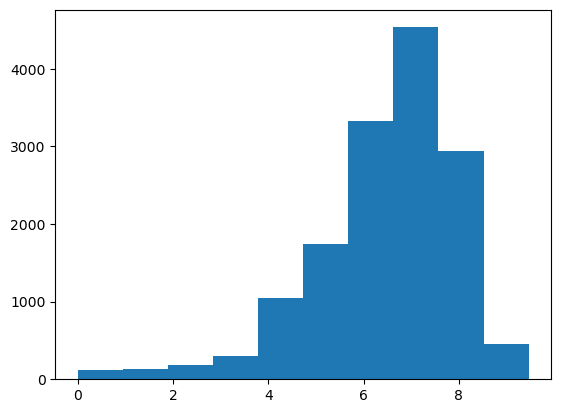

In [214]:
import numpy as np
log_revenue = np.log10(movies['revenue'])
hist = plt.hist(log_revenue)

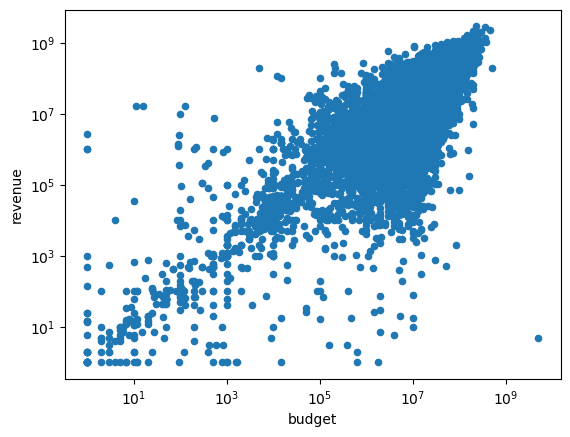

In [215]:
movies.plot(kind = 'scatter', x = 'budget', y = 'revenue', logx=True, logy=True)
plt.show()

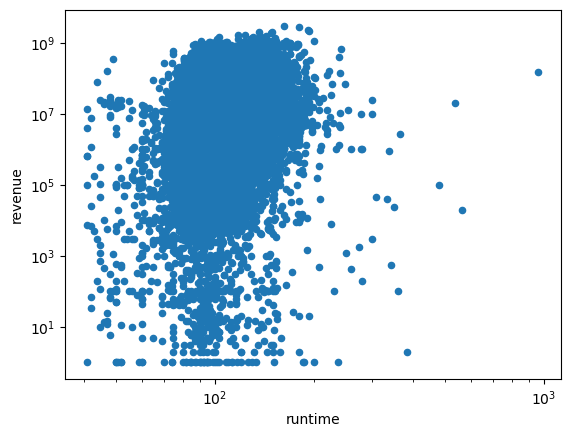

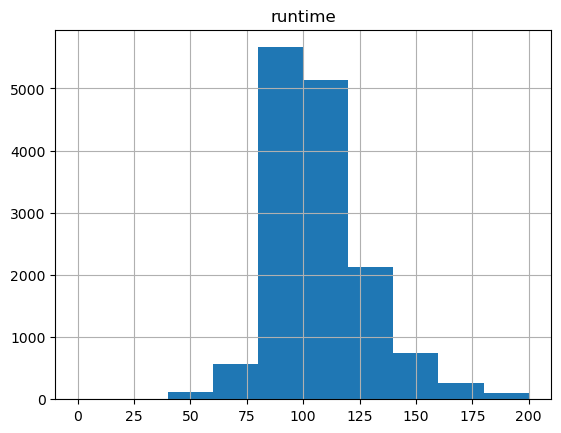

In [216]:
movies.plot(kind = 'scatter', x = 'runtime', y = 'revenue', logx = True, logy = True)
plt.show()
hist = movies.hist('runtime', range=[0,200])

In [217]:
print(movies[movies['runtime'] > 960])

Empty DataFrame
Columns: [id, title, genres, original_language, production_companies, release_date, budget, revenue, runtime, tagline, credits, keywords]
Index: []


In [218]:
n = len(movies)

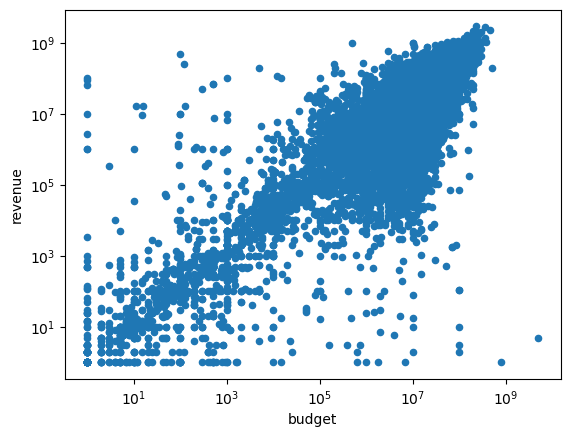

In [219]:
movies_budget_and_revenue.plot(kind = 'scatter', x = 'budget', y = 'revenue', logx=True, logy=True)
plt.show()

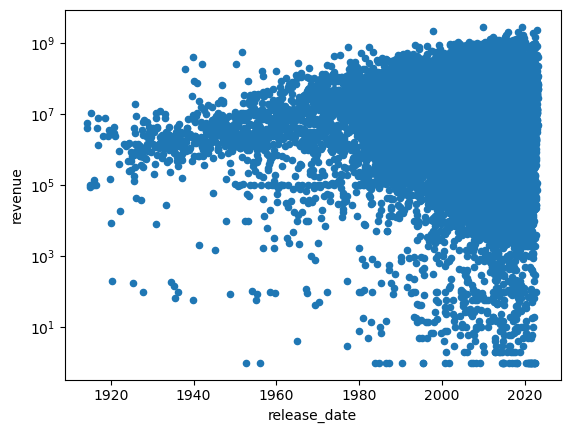

In [220]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.plot(kind = 'scatter', x = 'release_date', y = 'revenue', logy=True)
plt.show()

In [236]:
counter = {}
nano = 0
for i in tqdm(range(n)):
    s = movies['production_companies'][i]
    try:
        for com in s.split('-'):
            if com not in counter:
                counter[com] = 0
            counter[com] += 1
    except:
        movies.loc[i, 'production_companies'] = str("no_production_companies")
        s = movies['production_companies'][i]
        for com in s.split('-'):
            if com not in counter:
                counter[com] = 0
            counter[com] += 1

100%|█████████████████████████████████████████████████████████████████████████| 14783/14783 [00:00<00:00, 211011.99it/s]


In [269]:
import requests
import json

def get_dollar(start_time):
    api_url = "https://www.statbureau.org/calculate-inflation-price-jsonp?jsoncallback=?"

    headers = {'Content-type': 'application/json'}

    payload = {
        "country": "united-states",
        "start": str(start_time),
        "end": "2023/04/03",
        "amount": "1",
        "format": True
    }
    response = requests.post(api_url,  data=json.dumps(payload), headers=headers)
    my_bytes = response.content
    
    amount_s = my_bytes.decode('utf8').replace("'", '"')
    amount_s = amount_s[4:-2]
    return float(amount_s)
    
    
    
    


In [276]:
revenue_inflated = [0] * n
failed = []
for i in tqdm(range(n)):
    try:
        revenue_inflated[i] = get_dollar(movies.iloc[i]['release_date'])
    except:
#         print(x)
#         break
        failed.append(i)
print(failed)

 43%|█████████████████████████████████▎                                            | 6314/14783 [25:57<34:48,  4.05it/s]


NameError: name 'x' is not defined

In [277]:
print(revenue_inflated)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.32, 1.0, 1.0, 1.0, 1.03, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 1.04, 1.0, 1.0, 1.0, 1.0, 1.0, 1.08, 1.0, 1.0, 1.0, 1.0, 1.0, 1.44, 1.0, 1.0, 1.0, 1.31, 1.0, 1.47, 1.0, 1.47, 1.21, 1.15, 1.0, 1.02, 1.66, 1.0, 1.25, 1.0, 1.0, 1.0, 1.06, 1.0, 1.14, 1.39, 1.0, 1.07, 1.0, 1.2, 1.11, 1.08, 1.61, 1.19, 1.0, 1.0, 1.09, 1.0, 1.1, 1.0, 1.0, 1.0, 1.19, 1.0, 1.0, 1.02, 1.15, 1.0, 1.0, 1.0, 1.0, 1.39, 1.0, 1.22, 1.42, 1.0, 1.1, 1.47, 1.0, 1.0, 1.0, 1.0, 1.17, 1.0, 1.0, 1.0, 1.0, 1.19, 1.12, 1.26, 1.37, 1.0, 1.24, 1.02, 1.13, 1.77, 1.16, 1.5, 1.1, 1.0, 1.6, 1.42, 1.06, 1.12, 1.0, 1.0, 1.02, 1.0, 1.06, 1.02, 1.0, 1.03, 1.15, 1.0, 1.0, 1.0, 1.0, 1.09, 1.0, 1.25, 1.0, 1.0, 1.0, 1.0, 1.1, 1.0, 1.03, 1.09, 1.0, 1.9, 1.22, 1.15, 1.42, 2.4, 1.13, 1.11, 1.0, 1.01, 1.0, 1.0, 1.06, 1.09, 1.7, 1.1, 1.1, 1.15, 1.1, 2.07, 1.09, 1.1, 1.0, 1.0, 1.0, 1.0, 1.46, 1.2, 1.07, 

In [281]:
revenue_inflated_2 = [0] * n
for i in tqdm(range(6314, n)):
    try:
        revenue_inflated_2[i] = get_dollar(movies.iloc[i]['release_date'])
    except:
        failed.append(i)
print(failed)

100%|███████████████████████████████████████████████████████████████████████████████| 8469/8469 [35:04<00:00,  4.02it/s]

[6314, 12826, 12856, 12906, 12927, 13157, 13272, 13586, 13819, 13875, 13890, 13891, 13991, 14037, 14045, 14054, 14185, 14208, 14246, 14251, 14257, 14258, 14320, 14325, 14330, 14359, 14372, 14378, 14379, 14381, 14384, 14394, 14403, 14412, 14417, 14418, 14426, 14435, 14458, 14459, 14464, 14465, 14473, 14478, 14479, 14480, 14482, 14488, 14495, 14500, 14501, 14502, 14503, 14507, 14508, 14509, 14511, 14512, 14513, 14518, 14519, 14520, 14521, 14524, 14527, 14529, 14531, 14534, 14537, 14538, 14539, 14540, 14541, 14544, 14545, 14547, 14550, 14552, 14557, 14558, 14559, 14567, 14568, 14571, 14572, 14575, 14577, 14580, 14581, 14586, 14591, 14625, 14627, 14629, 14635, 14638, 14641, 14644, 14652, 14654, 14659, 14660, 14669, 14674, 14675, 14680, 14684, 14688, 14689, 14690, 14693, 14694, 14695, 14698, 14704, 14725, 14728, 14729, 14731, 14732, 14734, 14736, 14738, 14741, 14743, 14744, 14746, 14747, 14750, 14752, 14755, 14759, 14761, 14763, 14766, 14773, 14774, 14775, 14776, 14781, 14782]


In [282]:
for fail in failed:
    revenue_inflated_2[fail] = 1

In [285]:
for i in tqdm(range(6314, n)):
    revenue_inflated[i] = revenue_inflated_2[i]


100%|██████████████████████████████████████████████████████████████████████████| 8469/8469 [00:00<00:00, 4828267.03it/s]


In [293]:
revenue_inflated[i]

1

In [294]:
# Using 'Address' as the column name and equating it to the list


revenue_adjusted_c = movies['revenue'] * np.array(revenue_inflated)
df2 = movies.assign(revenue_adjusted=revenue_adjusted_c)
  

In [298]:
from pathlib import Path 
filepath = Path('movies_adjusted.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df2.to_csv(filepath)

<AxesSubplot:xlabel='Name'>

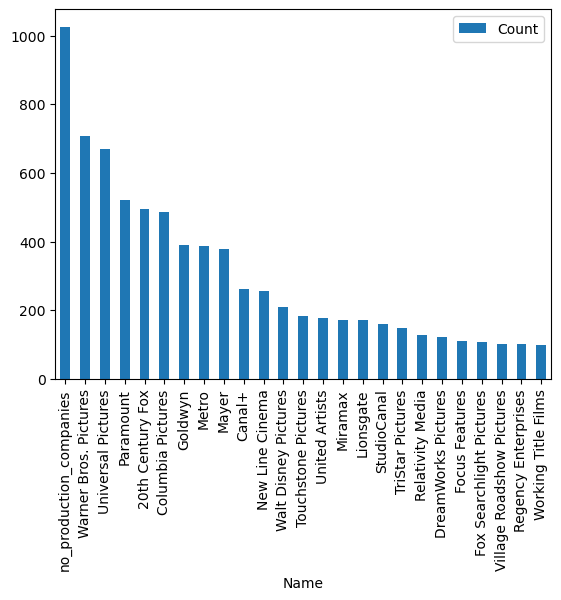

In [237]:
import collections

n_print = 25
credit_collection = collections.Counter(counter)

# for word, count in word_counter.most_common(n_print):
#     print(word, ": ", count)

lst = credit_collection.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Name', 'Count'])
df.plot.bar(x='Name',y='Count')

In [239]:
from tqdm import tqdm

n = len(movies)
credits = [0] * n
for i in tqdm(range(n)):
    try:
        credits[i] = str(movies['credits'][i]).split('-')
    except:
        print(movies['title'][i])
        print(movies['credits'][i])
        break

100%|██████████████████████████████████████████████████████████████████████████| 14783/14783 [00:00<00:00, 63232.24it/s]


In [240]:
credit_counter = {}

for i in tqdm(range(n)):
    for name in credits[i]:
        if name not in credit_counter:
            credit_counter[name] = 0
        credit_counter[name] += 1

100%|██████████████████████████████████████████████████████████████████████████| 14783/14783 [00:00<00:00, 90207.11it/s]


<AxesSubplot:xlabel='Name'>

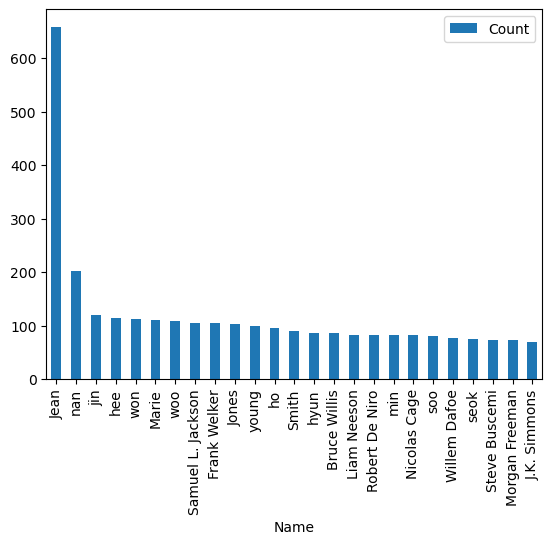

In [241]:
import collections

n_print = 25
credit_collection = collections.Counter(credit_counter)

# for word, count in word_counter.most_common(n_print):
#     print(word, ": ", count)

lst = credit_collection.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Name', 'Count'])
df.plot.bar(x='Name',y='Count')

In [242]:
import requests
api_url = "https://www.statbureau.org/calculate-inflation-price-jsonp?jsoncallback=?"
response = requests.get(api_url, {
                country: 'united-states',
                start: $('').val(),
                end: $('#endDate').val(),
                amount: $('#startPrice').val(),
                format: true
            })
response.json()

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

In [261]:

my_json = my_bytes.decode('utf8').replace("'", '"')
print(my_json)

?("$66.80")


In [ ]:
<script type="text/javascript">
        var apiUrl = '';

        $('#calc').on('click', function calculate() {
            $.getJSON(apiUrl, {
                country: 'united-states',
                start: $('#startDate').val(),
                end: $('#endDate').val(),
                amount: $('#startPrice').val(),
                format: true
            })
              .done(function (data) {
                  $('#endPrice').val(data);
              });
        });
    </script>